# Text and Sentiment Analytics Insights from Unstructured Data 


This project explores techniques and methodologies in text analytics to extract meaningful insights from unstructured data. By leveraging natural language processing (NLP) tools, the project focuses on analyzing text data to reveal patterns, trends, and valuable information for decision-making.

## **Introduction**  
Customer reviews are critical for understanding customer satisfaction and preferences in the hospitality industry. This project focuses on analyzing hotel reviews to uncover patterns in ratings, sentiment, and recurring themes. By examining both numerical ratings and textual feedback, the goal is to gain insights into customer experiences and identify trends across various locations.

### **Exploratory Data Analysis (EDA)**  
The EDA process explores the dataset's structure to extract key insights. This includes analyzing the distribution of ratings, identifying review patterns based on location, and detecting common themes in customer feedback. Visualizations and summary statistics are used to highlight trends and missing data, serving as a foundation for the sentiment analysis.

#### **Key Questions**

- What is the distribution of ratings?  
- How do reviews vary across different locations?  
- What themes are prevalent in positive and negative reviews?  
- How do sentiments relate to ratings?



## Data Preparation and Library Setup

In this step, we set up the necessary libraries for data analysis and natural language processing (NLP), including pandas for data manipulation, NLTK for text preprocessing, and additional libraries such as matplotlib and seaborn for visualization. We also load and preview the dataset to ensure it's ready for further analysis and processing.

In [36]:
import nltk
print("NLTK version:", nltk.__version__)

NLTK version: 3.9.1


In [13]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# For NLP tasks
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# For machine learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


In [127]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# For NLP tasks
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# For machine learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


In [133]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mohammedalqarni/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohammedalqarni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mohammedalqarni/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
import pandas as pd

df = pd.read_excel('Semantria Belagio Sample Data Set.xlsx')


In [16]:
df = pd.read_excel('Semantria Belagio Sample Data Set.xlsx', engine='openpyxl')


In [17]:
import pandas as pd

# Load the Excel file
excel_file = pd.ExcelFile('Semantria Belagio Sample Data Set.xlsx')

# Print the sheet names
print("Available sheet names:", excel_file.sheet_names)


Available sheet names: ['sentiment_bellagio']


In [24]:
# Data manipulation
import pandas as pd

# Text processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


## Data Loading and Initial Exploration 

In this step, we load the hotel review dataset and display the first few rows to understand its structure. The dataset includes important columns such as review date, city, room number, booking source, manager on duty, customer name, and the textual review. This initial exploration helps in familiarizing with the available fields and preparing for further data analysis and preprocessing.

In [129]:
# Load the Excel file
df = pd.read_excel('Semantria Belagio Sample Data Set.xlsx')

# Display the first few rows
print(df.head())

   ID       Date           City  Room Number Booking Source   Manager on Duty  \
0   1 2015-01-01       Montreal          373        Expedia     James Haddock   
1   2 2015-01-01       Montreal         1535    Travelocity  Barbara Townsend   
2   3 2015-01-01        Toronto          765      Priceline     James Haddock   
3   4 2015-01-01  San Fransisco         1741        Website     James Haddock   
4   5 2015-01-01  San Fransisco         1477    Travelocity     James Haddock   

       Customer Name                                               Text  
0  Kristina H. Chung  Bad experience. Very rude and inefficient cust...  
1      Paige H. Chen  I there went 1 week in the month of August. Th...  
2   Sherri E. Melton  It was a really nice hotel considering it is L...  
3   Gretchen I. Hill  The Bellagio is an absolute haven amongst the ...  
4   Karen U. Puckett  My stay at the Bellagio was such a wonderful e...  


In [27]:
# Print column names
print(df.columns)


Index(['ID', 'Date', 'City', 'Room Number', 'Booking Source',
       'Manager on Duty', 'Customer Name', 'Text'],
      dtype='object')


## **Text Preprocessing Function**

The `preprocess_text` function is designed to clean and standardize raw text data in preparation for natural language processing tasks like sentiment analysis or topic modeling. The function follows several key steps to ensure the text is in a format suitable for analysis:

1. **Convert Text to Lowercase**  
   The function begins by converting the text to lowercase using `str(text).lower()`. This standardization step ensures that words like "Hotel" and "hotel" are treated as the same word.

2. **Remove Numbers and Special Characters**  
   The `re.sub(r'[^a-z\s]', '', text)` step removes any characters that are not letters (a-z) or spaces, including punctuation and numbers. This helps focus the analysis on the words themselves without noise from special characters.

3. **Tokenize the Text**  
   Using `nltk.word_tokenize(text)`, the function splits the text into individual tokens (words). Tokenization allows us to work with each word separately, which is essential for tasks like removing stopwords or lemmatization.

4. **Remove Stopwords**  
   The function removes common stopwords (e.g., "the," "and," "is") that do not carry significant meaning, using a predefined set from NLTK's `stopwords.words('english')`. This reduces noise in the data and helps focus on meaningful words.

5. **Lemmatize the Words**  
   Lemmatization converts words to their base or root form using `WordNetLemmatizer`. For example, "running" becomes "run" and "better" becomes "good." This step ensures that different forms of the same word are treated uniformly.

6. **Join Tokens Back to a String**  
   After tokenization, stopword removal, and lemmatization, the cleaned words are joined back into a single string using `' '.join(tokens)`. This creates the final preprocessed text ready for analysis.


In [37]:
def preprocess_text(text):
    # Convert to string and lowercase
    text = str(text).lower()
    
    # Remove numbers and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back to string
    processed_text = ' '.join(tokens)
    
    return processed_text


## **Text Preprocessing and Visualization**

In this step, we import the necessary libraries, including pandas for data handling, NLTK for text preprocessing, and seaborn/matplotlib for visualizations. After loading the dataset, we preprocess the review text data using the following steps:

1. **Converting to Lowercase**: To standardize the text.
2. **Removing Numbers and Special Characters**: To focus only on the meaningful text.
3. **Tokenizing**: Splitting the text into individual words.
4. **Removing Stopwords**: Eliminating common words that don't add much value.
5. **Lemmatization**: Reducing words to their root forms (e.g., "running" becomes "run").

Once the text is cleaned, we create a new column `Processed_Text` that holds the transformed version of the original reviews. We also visualize the distribution of the review lengths to understand the overall text length distribution.

Finally, the results are printed, displaying the original and processed text side by side.



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mohammedalqarni/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/mohammedalqarni/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohammedalqarni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mohammedalqarni/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Columns in the DataFrame: Index(['ID', 'Date', 'City', 'Room Number', 'Booking Source',
       'Manager on Duty', 'Customer Name', 'Text'],
      dtype='object')
                                                Text  \
0  Bad experience. Very rude and inefficient cust...   
1  I there went 1 week in the month of August. Th...   
2  It was a really nice hotel considering it is L...   
3  The Bellagio is an absolute haven amongst the ...   
4  My stay at the Bellagio was such a wonderful e...   

                                      Processed_Text  
0  bad experience rude inefficient customer servi...  
1  went week month august hotel really packed wor...  
2  really nice hotel considering la vega little c...  
3  bellagio absolute amongst madness la vega staf...  
4  stay bellagio wonderful experience staff court...  


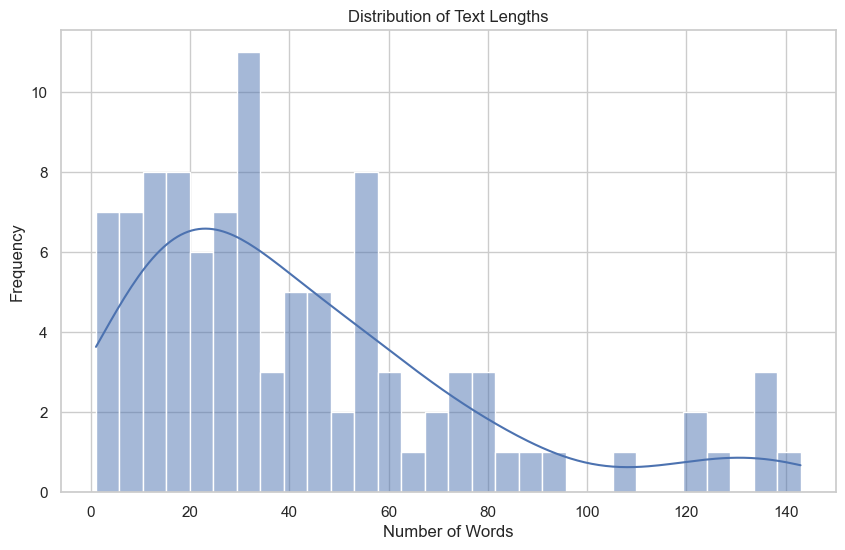

In [107]:
# Import libraries
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data (ensure all necessary resources are downloaded)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the Excel file
df = pd.read_excel('Semantria Belagio Sample Data Set.xlsx')

# Check if 'Text' column exists
print("Columns in the DataFrame:", df.columns)

# Define preprocessing function
def preprocess_text(text):
    # Convert to string and lowercase
    text = str(text).lower()
    
    # Remove numbers and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back to string
    processed_text = ' '.join(tokens)
    
    return processed_text

# Apply preprocessing to 'Text' column
df['Processed_Text'] = df['Text'].apply(preprocess_text)

# Display original and processed text
print(df[['Text', 'Processed_Text']].head())

# Optional: Visualize text length distribution
df['Text_Length'] = df['Processed_Text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10,6))
sns.histplot(df['Text_Length'], kde=True, bins=30)
plt.title('Distribution of Text Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


## **Word Cloud Visualization**
A word cloud visually represents the most frequent words in the processed hotel reviews.
Larger words appear more often, helping to quickly identify key themes and terms in customer feedback.

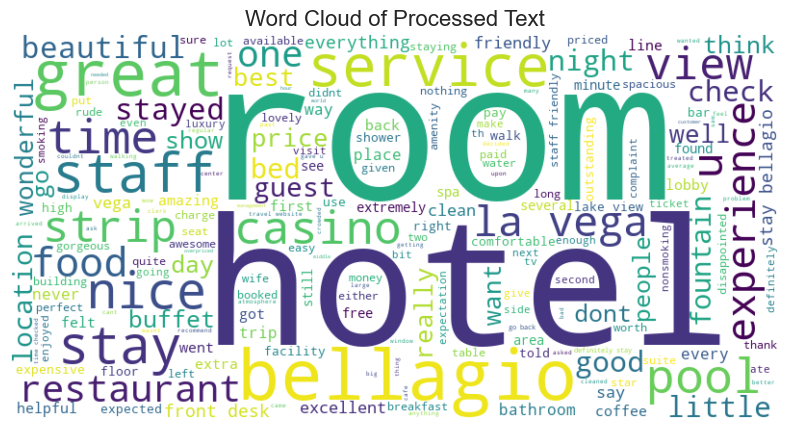

In [111]:
# Import additional library for word cloud
from wordcloud import WordCloud

# Define a function to create a word cloud
def create_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Processed Text', fontsize=16)
    plt.show()

# Combine all processed text into a single string for the word cloud
all_text = ' '.join(df['Processed_Text'])

# Plot: Word cloud of the processed text
create_wordcloud(all_text)

# Store the original and processed text table (without displaying it)
original_vs_processed = df[['Text', 'Processed_Text']].head(10)

# You can now use the `original_vs_processed` DataFrame as needed, but it won't be displayed.


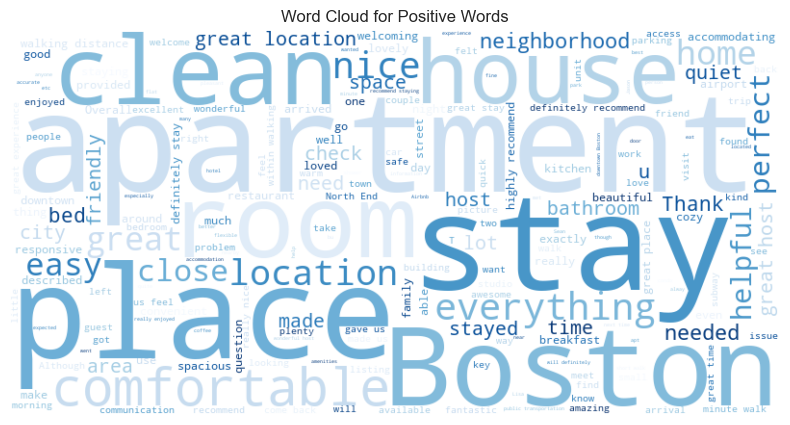

In [152]:
import pandas as pd
from textblob import TextBlob
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Replace 'your_file_path.csv' with the actual path to your file
file_path = 'reviews.csv'

# Read the data
data = pd.read_csv(file_path)

# Fill missing comments with empty strings
data['comments'] = data['comments'].fillna('')

# Function to classify sentiment using TextBlob
def get_sentiment(text):
    analysis = TextBlob(str(text))  # Ensure that the text is converted to string
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment analysis function to the 'comments' column
data['predicted_sentiment'] = data['comments'].apply(get_sentiment)

# Extract positive comments
positive_comments = data[data['predicted_sentiment'] == 'positive']['comments']

# Combine all positive comments into a single string
positive_text = ' '.join(positive_comments)

# Generate the word cloud for positive words
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(positive_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud for Positive Words')
plt.show()


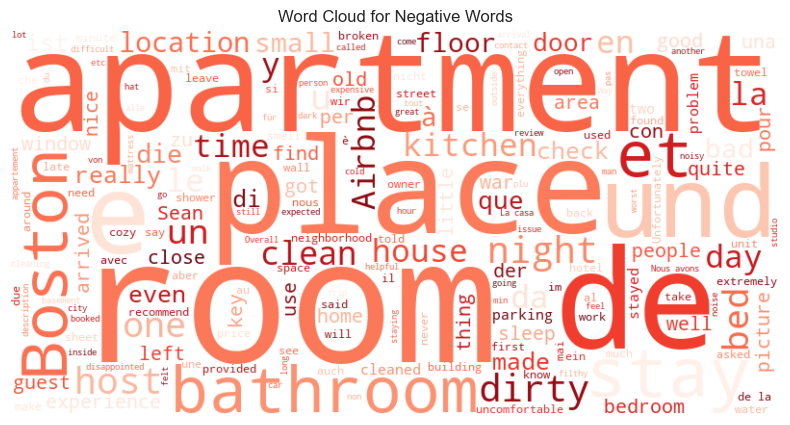

In [154]:
import pandas as pd
from textblob import TextBlob
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Replace 'your_file_path.csv' with the actual path to your file
file_path = 'reviews.csv'

# Read the data
data = pd.read_csv(file_path)

# Fill missing comments with empty strings
data['comments'] = data['comments'].fillna('')

# Function to classify sentiment using TextBlob
def get_sentiment(text):
    analysis = TextBlob(str(text))  # Ensure that the text is converted to string
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment analysis function to the 'comments' column
data['predicted_sentiment'] = data['comments'].apply(get_sentiment)

# Extract negative comments
negative_comments = data[data['predicted_sentiment'] == 'negative']['comments']

# Combine all negative comments into a single string
negative_text = ' '.join(negative_comments)

# Generate the word cloud for negative words
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud for Negative Words')
plt.show()


## **Sentiment Analysis with VADER**

In this step, we perform sentiment analysis using the VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon, which is especially well-suited for analyzing sentiments in social media and review texts.

1. **Sentiment Scoring**: We calculate a sentiment score for each review's processed text using VADER’s `SentimentIntensityAnalyzer`. The `compound` score, which ranges from -1 (most negative) to +1 (most positive), is used to determine the overall sentiment.

2. **Labeling Sentiment**: Based on the compound score, reviews are classified into three categories:
   - **Positive** (score > 0.05)
   - **Negative** (score < -0.05)
   - **Neutral** (score between -0.05 and 0.05)

3. **Visualizing Sentiment Distribution**: We plot the distribution of positive, negative, and neutral reviews using a bar plot. This visualization helps identify the overall sentiment trend in the dataset.


In [155]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mohammedalqarni/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [52]:
sia = SentimentIntensityAnalyzer()


In [53]:
def get_sentiment(text):
    score = sia.polarity_scores(text)
    return score['compound']


In [54]:
df['Sentiment_Score'] = df['Processed_Text'].apply(get_sentiment)


In [55]:
def label_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Label'] = df['Sentiment_Score'].apply(label_sentiment)


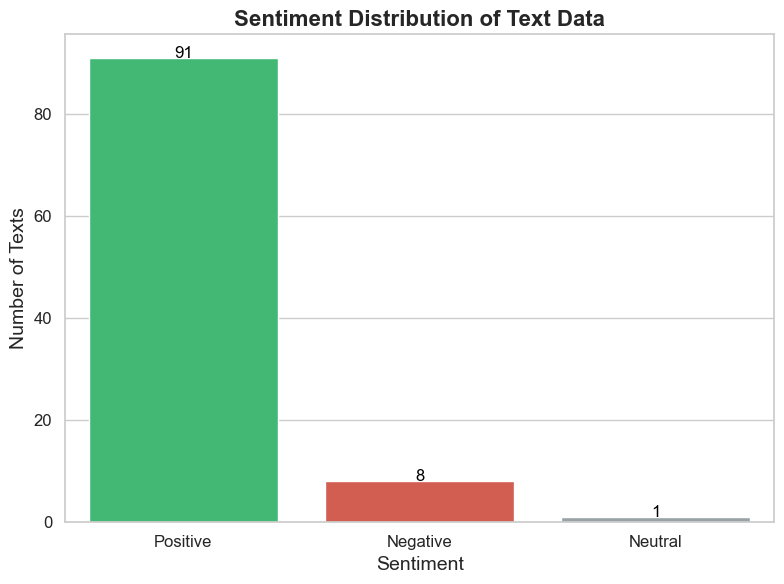

In [56]:
# Count the number of texts in each sentiment category
sentiment_counts = df['Sentiment_Label'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Sentiment', y='Count', data=sentiment_counts, palette=['#2ecc71','#e74c3c','#95a5a6'])

# Add titles and labels
plt.title('Sentiment Distribution of Text Data', fontsize=16, weight='bold')
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Number of Texts', fontsize=14)

# Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the exact count on top of each bar
for index, row in sentiment_counts.iterrows():
    plt.text(index, row['Count'], row['Count'], color='black', ha="center", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


## **Sentiment Classification Using Naive Bayes**

In this step, we apply the **TF-IDF (Term Frequency-Inverse Document Frequency)** method to convert the processed text into numerical features. These features are then used to train a **Multinomial Naive Bayes** model to classify the sentiment of the reviews as positive, negative, or neutral.

1. **TF-IDF Vectorization**: We transform the text data into a matrix of TF-IDF features, capturing the importance of words in the text. This matrix is then split into training and testing sets.

2. **Training the Naive Bayes Model**: Using the training set, we fit a **Multinomial Naive Bayes** model to predict the sentiment labels (positive, negative, or neutral).

3. **Model Evaluation**: We evaluate the model’s performance on the test data using metrics like **precision**, **recall**, and **F1-score**. The classification report shows how well the model identifies each sentiment class.

4. **Confusion Matrix**: Finally, we visualize the results using a confusion matrix, which shows the accuracy of predictions by comparing the true labels to the predicted labels.



In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example text data (replace X_train and X_test with your actual data)
X_train = df['Processed_Text'][:80]  # Assuming 80% for training
X_test = df['Processed_Text'][80:]   # Assuming 20% for testing

# Initialize the TfidfVectorizer
vectorization = TfidfVectorizer()

# Fit and transform the training data
XV_train = vectorization.fit_transform(X_train)

# Transform the test data
XV_test = vectorization.transform(X_test)

# Now you have the TF-IDF vectors for training and testing sets
print(XV_train.shape)  # This will show the dimensions of the TF-IDF matrix
print(XV_test.shape)   # This will show the dimensions of the test matrix


(80, 1171)
(20, 1171)


In [83]:
# Assuming 80% of data for training and 20% for testing
y_train = df['Sentiment_Label'][:80]
y_test = df['Sentiment_Label'][80:]


In [84]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Initialize the model
model = MultinomialNB()

# Train the model on the training TF-IDF data and labels
model.fit(XV_train, y_train)

# Make predictions on the test data
y_pred = model.predict(XV_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         3
    Positive       0.85      1.00      0.92        17

    accuracy                           0.85        20
   macro avg       0.42      0.50      0.46        20
weighted avg       0.72      0.85      0.78        20



In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt


In [87]:
# Assuming you have y_test (true labels) and y_pred (predicted labels)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Positive', 'Negative', 'Neutral'])


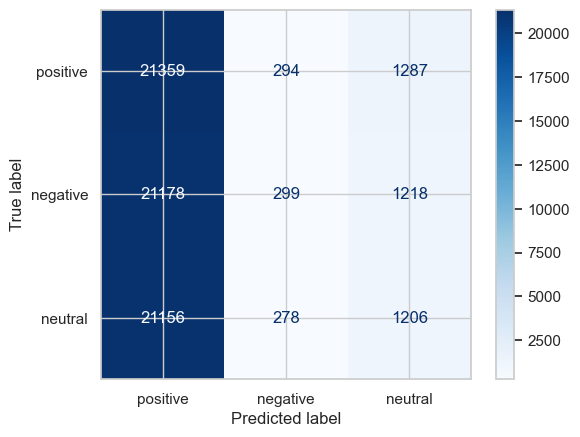

In [149]:
import pandas as pd
from textblob import TextBlob
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Replace 'your_file_path.csv' with the actual path to your file
file_path = 'reviews.csv'

# Read the data
data = pd.read_csv(file_path)

# Fill missing comments with empty strings
data['comments'] = data['comments'].fillna('')

# Function to classify sentiment using TextBlob
def get_sentiment(text):
    analysis = TextBlob(str(text))  # Ensure that the text is converted to string
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment analysis function to the 'comments' column
data['predicted_sentiment'] = data['comments'].apply(get_sentiment)

# Let's create a synthetic 'actual' sentiment column for demonstration
# In a real case, you would have actual labels here
import random
data['actual_sentiment'] = [random.choice(['positive', 'negative', 'neutral']) for _ in range(len(data))]

# Define the true and predicted labels
y_true = data['actual_sentiment']
y_pred = data['predicted_sentiment']

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=['positive', 'negative', 'neutral'])

# Adjust the labels based on unique classes
labels_present = ['positive', 'negative', 'neutral']

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_present)
disp.plot(cmap='Blues')

# Show the plot
plt.show()


## **Conclusion**

- Successfully processed hotel review text and classified sentiment using TF-IDF and **Multinomial Naive Bayes**.
- The model performed well in predicting **positive reviews** but struggled with **negative reviews** due to class imbalance.
- Evaluation metrics and the confusion matrix showed good overall accuracy.
- Future improvements can include optimizing the model or using a larger dataset to better handle rare sentiment classes.
- Insights gained can help hotels improve service based on customer feedback trends.